In [1]:
import numpy as np
import math
from scipy import integrate
import matplotlib.pyplot as plt
import random
import time
from scipy.stats import rankdata

In [2]:
def GoodS(N,M,K):
    S = np.zeros(M)
    b = np.zeros(M)
    c = np.zeros(M)
    
    n = np.zeros((M,6))
    
    for i in range(M-10):
        S[i] = random.randint(0,2*N)
        b[i] = np.random.binomial(S[i],0.5)
        c[i] = S[i] - b[i]
    
    for i in range(M-10, M):
        S[i] = random.randint(0,2*N)
        b[i] = np.random.binomial(S[i],0.55)
        c[i] = S[i] - b[i]
    
    stats = np.zeros(M)
    
    for i in range(M):
        if b[i] == 0 and c[i] == 0:
            stats[i] = 0
        else:
            stats[i] = (b[i]-c[i])**2/(b[i]+c[i])

    x = np.argsort(stats)
    #for i in range(10):
    #   print(x[M-1-i])
    
    g = sorted(stats, reverse=True)
    
    zeros = np.zeros(M)
    y = np.fft.fft(g)
    prime_y = np.fft.fft(zeros)
    #print(g[0:20])
    #print("-----")
    
    ss = 0
    
    for s in range(int(M/2)+1):
        if s == 0:
            prime_y[0] = y[0]
        else:
            prime_y[s] = y[s]
            prime_y.real[int(M)-s] = prime_y.real[s]
            prime_y.imag[int(M)-s] = -prime_y.imag[s]
            
        prime_g = np.fft.ifft(prime_y)
        prime_r = np.argsort(prime_g)
        
        srank = 0
        for i in range(int(M)-K,int(M)):
            srank += prime_r[i]
        drank = 0
        for i in range(K):
            drank += i
        if(srank == drank):
            ss = s
            #print(s)
            #print(prime_g.real[0:20])
            break
    
    return ss

[[ 1896.   839.   622.   216.]
 [ 4832.  2240.   979.   414.]
 [ 6138.  3633.  1715.   719.]
 [ 8243.  3908.  2174.  1203.]
 [10476.  6781.  2381.  1181.]
 [11018.  4021.  2795.  1715.]
 [11571.  4549.  2945.  1589.]
 [18534. 10888.  4218.  2379.]
 [18913. 10482.  5737.  2275.]
 [23667.  9904.  5611.  2679.]]
[[ 2009.  1079.   435.   205.]
 [ 4191.  1890.   975.   478.]
 [ 4897.  2878.  1758.   738.]
 [ 8542.  3139.  2339.  1020.]
 [ 9227.  4366.  3699.  1303.]
 [11398.  8234.  4230.  1700.]
 [16470.  6993.  3856.  1445.]
 [12928.  6372.  4890.  2417.]
 [17436.  9994.  4933.  2716.]
 [21240.  6338.  7897.  2672.]]
[[ 2422.   882.   499.   192.]
 [ 3610.  2302.  1039.   371.]
 [ 5475.  2559.  1548.   679.]
 [ 9482.  3524.  2100.  1283.]
 [10194.  3827.  2257.  1312.]
 [11607.  5343.  2650.  1338.]
 [15820.  6956.  4079.  1849.]
 [15275.  6022.  4004.  2149.]
 [20392.  9676.  5101.  2411.]
 [18365. 12031.  6025.  2971.]]
[[ 2087.   931.   687.   176.]
 [ 4688.  1554.  1138.   397.]
 [ 71

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[[ 2167.   844.   503.   229.]
 [ 2924.  2244.  1180.   560.]
 [ 5803.  2502.  2168.   892.]
 [ 8843.  3826.  2273.   965.]
 [ 8308.  3990.  3086.  1135.]
 [14807.  5953.  3081.  1435.]
 [13122.  5188.  3355.  2079.]
 [17923.  7010.  3902.  2062.]
 [19780.  8183.  4225.  2076.]
 [24839. 10525.  4679.  2590.]]
[[ 2185.3   916.8   574.7   273.4]
 [ 4135.7  2094.5  1041.5   487.1]
 [ 5885.   2778.5  1668.5   798.3]
 [ 8445.2  3645.5  2206.9  1162.9]
 [10065.1  4445.3  2668.1  1226.2]
 [12391.8  5899.6  3276.3  1631.5]
 [14150.9  6331.   4076.8  1769.1]
 [16300.   7247.   4328.4  2208.5]
 [19557.3  9007.6  5191.9  2487.5]
 [21259.8 10931.9  5804.9  2599. ]]


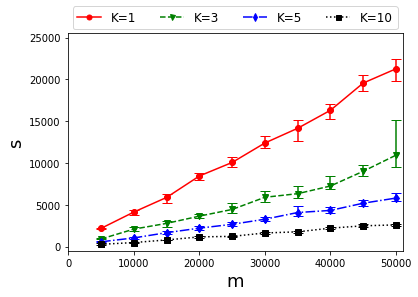

In [3]:
N = 2000
M = np.zeros(10)
for i in range(10):
    M[i] = 5000 * (i+1)
K = [1,3,5,10]

s = np.zeros((10,4))
maxs = np.zeros((10,4))
mins = np.ones((10,4)) * 50000
sums = np.zeros((10,4))

s_err = np.zeros((2,10,4))


for j in range(10):
    for i in range(10):
        for k in range(4):
            s[i][k] = GoodS(N, int(M[i]), K[k])
            if s[i][k] > maxs[i][k]:
                maxs[i][k] = s[i][k]
            if s[i][k] < mins[i][k]:
                mins[i][k] = s[i][k]
    print(s)
    sums += s

s = sums / 10
print(s)
#print(maxs)
#print(mins)
for i in range(4):
    s_err[0,:,i] = s[:,i] - mins[:,i]
    s_err[1,:,i] = maxs[:,i] - s[:,i]
s_err /= np.sqrt(10)

fig = plt.figure()
plt.ylim(-500, 25500)
plt.xlim(-100, 51000)
plt.errorbar(M, s[:,0], yerr = s_err[:,:,0], capsize=5, fmt='o', ecolor='red', markeredgecolor = "red", color='red')
plt.plot(M, s[:,0], marker="o", markersize=5, color = "red", linestyle = "-", label = "K=1")
plt.errorbar(M, s[:,1], yerr = s_err[:,:,1], capsize=5, fmt='v', ecolor='green', markeredgecolor = "green", color='green')
plt.plot(M, s[:,1], marker="v", markersize=5, color = "green", linestyle = "--", label = "K=3")
plt.errorbar(M, s[:,2], yerr = s_err[:,:,2], capsize=5, fmt='d', ecolor='blue', markeredgecolor = "blue", color='blue')
plt.plot(M, s[:,2], marker="d", markersize=5, color = "blue", linestyle = "dashdot", label = "K=5")
plt.errorbar(M, s[:,3], yerr = s_err[:,:,3], capsize=5, fmt='s', ecolor='black', markeredgecolor = "black", color='black')
plt.plot(M, s[:,3], marker="s", markersize=5, color = "black", linestyle = "dotted", label = "K=10")
plt.legend(bbox_to_anchor=(0.5, 1.02), loc='lower center', borderaxespad=0, ncol=4, fontsize=12)
plt.xlabel("m", fontsize = 18)
plt.ylabel("s", fontsize = 18)
fig.savefig("GoodS.png")
fig.savefig("figs/GoodS.eps", bbox_inches="tight", pad_inches=0.05)